# Comparative Environmental Shock Plots

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import pandas as pd
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from scipy.special import lambertw
import matplotlib.colors
import copy
from matplotlib.colors import LinearSegmentedColormap
import ipynb.fs.defs.Functions_Equations_Equilibrium_Simulation as baseFuncs
import ipynb.fs.defs.Functions_Environmental_Shock as shockFuncs

In [2]:
def plotShocks(timesteps1, R_us1, R_os1, w_As1, rds1, shock_times1,
              timesteps2, R_us2, R_os2, w_As2, rds2, shock_times2,
              saveFig = False, saveName = "Environmental Shock.png"):
    
    fig, axs = plt.subplots(3, 2, constrained_layout = False, figsize = (8,4))
    label_fs = 11  # Label font size for y axes
    other_fs = 11
    
    # Creating final arrays needed for plot
    R_s1 = np.asarray(R_us1)+np.asarray(R_os1)
    R_s2 = np.asarray(R_us2)+np.asarray(R_os2)
    R_max = np.ones(len(R_us1))*para['w_max']/para['k_A']
    R_max_val = int(para['w_max']/para['k_A'])
    prop_R_o1 = np.asarray(R_os1)/np.asarray(R_s1)
    prop_w_A1 = np.asarray(w_As1)/(np.ones(np.asarray(w_As1).shape)*para['w_max'])
    prop_R_o2 = np.asarray(R_os2)/np.asarray(R_s2)
    prop_w_A2 = np.asarray(w_As2)/(np.ones(np.asarray(w_As2).shape)*para['w_max'])
    admin_waste1 = prop_w_A1*prop_R_o1
    admin_waste2 = prop_w_A2*prop_R_o2
        
    
    # LEFT COLUMN
   # axs[0,0].set_title("(A) Restabilization after Shock", fontsize = other_fs, fontweight = "bold")
#    axs[0,0].text(300, 1.8, "(A)", fontsize = other_fs, fontweight = "bold")
    axs[0,0].set_ylabel('Obsolescent \n'+ r'rate ($1/T_d$)', fontsize = label_fs)
    axs[0,0].plot(timesteps1, rds1, color = 'black')
    axs[0,0].set_ylim(0,1.1*max(np.max(rds1), np.max(rds2)))
    
    axs[1,0].set_ylabel('Processes', fontsize = label_fs)
    axs[1,0].plot(timesteps1, R_us1, color = 'green')
    axs[1,0].plot(timesteps1, R_os1, color = 'purple', linestyle = "--")
    axs[1,0].plot(timesteps1, R_max, color = 'black', linestyle = ":", linewidth = 2)
    axs[1,0].set_ylim(0,1.15*R_max_val)
    
    axs[2,0].set_ylabel('Admin. \nMeasures', fontsize = label_fs)
    axs[2,0].plot(timesteps1, prop_w_A1, color = 'blue')
    axs[2,0].plot(timesteps1, prop_R_o1, color = 'orange', linestyle = "--")
    axs[2,0].plot(timesteps1, admin_waste1, color = 'red', linestyle = ":")
    axs[2,0].plot(timesteps1, np.ones(len(timesteps1)), color = 'black', linestyle = ":", linewidth = 2)
    axs[2,0].set_ylim(0,1.20)
    axs[2,0].set_xlabel("Months")
    
    # Axis Ticks and Labels:
    #axs[0,0].set_yticks([0,np.round(1.1*max(np.max(rds1), np.max(rds2)), 2)])
    axs[1,0].get_yaxis().set_ticks([0, int(R_max_val/4), int(R_max_val/2), int(3*R_max_val/4), R_max_val])
    axs[0,0].get_xaxis().set_ticks([])
    axs[1,0].get_xaxis().set_ticks([])
    axs[2,0].get_yaxis().set_ticks([0,1])
    
    
    #RIGHT COLUMN
#    axs[0,1].set_title("(B) Run-away Bloat after Shock", fontsize = other_fs, fontweight = "bold")
#    axs[0,1].text(300, 1.8, "(B)", fontsize = other_fs, fontweight = "bold")

    axs[0,1].set_ylabel('Obsolescent \n'+ r'rate ($1/T_d$)', fontsize = label_fs)
    axs[0,1].plot(timesteps2, rds2, color = 'black')
    axs[0,1].set_ylim(0,1.1*max(np.max(rds1), np.max(rds2)))
    
    axs[1,1].set_ylabel('Processes', fontsize = label_fs)
    axs[1,1].plot(timesteps2, R_us2, color = 'green')
    axs[1,1].plot(timesteps2, R_os2, color = 'purple', linestyle = "--")
    axs[1,1].plot(timesteps2, R_max, color = 'black', linestyle = ":", linewidth = 2)
    axs[1,1].set_ylim(0,1.15*R_max_val)
    
    axs[2,1].set_ylabel('Admin. \nMeasures', fontsize = label_fs)
    axs[2,1].plot(timesteps2, prop_w_A2, color = 'blue')
    axs[2,1].plot(timesteps2, prop_R_o2, color = 'orange', linestyle = "--")
    axs[2,1].plot(timesteps2, admin_waste2, color = 'red', linestyle = ":")
    axs[2,1].plot(timesteps1, np.ones(len(timesteps1)), color = 'black', linestyle = ":", linewidth = 2)
    axs[2,1].set_ylim(0,1.2)
    axs[2,1].set_xlabel("Months")
    
    # Y axis ticks gone
    axs[1,1].get_yaxis().set_ticks([0, int(R_max_val/4), int(R_max_val/2), int(3*R_max_val/4), R_max_val])
    axs[0,1].get_xaxis().set_ticks([])
    axs[1,1].get_xaxis().set_ticks([])
    axs[2,1].get_yaxis().set_ticks([0,1])
    #axs[0,1].set_yticks([0,np.round(1.1*max(np.max(rds1), np.max(rds2)), 2)])
    
    # Adjust spacing
    fig.subplots_adjust(hspace = 0.1, wspace = 0.35)
    
    # Create Legend
    drop = 0.275
    custom_lines = [Line2D([0], [0], color='green', lw=1), Line2D([0], [0], color='purple', linestyle = "--", lw=1), 
                    Line2D([0], [0], color='black', linestyle = ":", lw=2)]
    fig.legend(custom_lines, ['Useful Processes ($R_u$)', 'Obsolete Processes ($R_o$)', "Resource Capacity"], handlelength = 2, 
               bbox_to_anchor=(0.925,0.9-drop), loc = "upper left", frameon = False, fontsize = other_fs)
    custom_lines = [Line2D([0], [0], color='blue', lw=1), Line2D([0], [0], color='orange', linestyle = "--", lw=1), 
                    Line2D([0], [0], color='red', linestyle = ":", lw=1), 
                    Line2D([0], [0], color='black', linestyle = ":", lw=2)]
    fig.legend(custom_lines, ["Administrative Costs", "Obsolete Process Proportion", "Administrative Waste", "Admin. Measures Cap"], handlelength = 2, 
               bbox_to_anchor=(0.925,0.65-drop), loc = "upper left", frameon = False, fontsize = other_fs)
    
    
    if saveFig:
        plt.savefig("Fig5_shocks.png", dpi = 700, bbox_inches = "tight")
    else:
        plt.show()

In [34]:
t_span = 350
shock_times1 = [50, 62]
shock_times2 = [50, 62]
rd_multiplier1 = 50
rd_multiplier2 = 80

# First simulation
para = baseFuncs.paraReset()
para['dtilde'] = 0.5
para['gamma_c'] = 0.75
para['gamma_p'] = 0.3
base_para1 = copy.deepcopy(para)
shock_para1 = copy.deepcopy(para)
shock_para1['r_d'] *= rd_multiplier1


R_us1, R_os1, w_As1, w_Ds1, Us1, _, timesteps1, rds1 = shockFuncs.simulate_behavioral_shock(base_para1, shock_para1, t_span, shock_times1)

# Second simulation
para = baseFuncs.paraReset()
para['dtilde'] = 0.5
para['gamma_c'] = 0.75
para['gamma_p'] = 0.3
base_para2 = copy.deepcopy(para)
shock_para2 = baseFuncs.paraReset()
shock_para2['dtilde'] = 0.5
shock_para2['gamma_c'] = 0.75
shock_para2['gamma_p'] = 0.3
shock_para2['r_d'] *= rd_multiplier2

R_us2, R_os2, w_As2, w_Ds2, Us2, _, timesteps2, rds2 = shockFuncs.simulate_behavioral_shock(base_para2, shock_para2, t_span, shock_times2,
                                                                                            process_removal_proportion = 0)

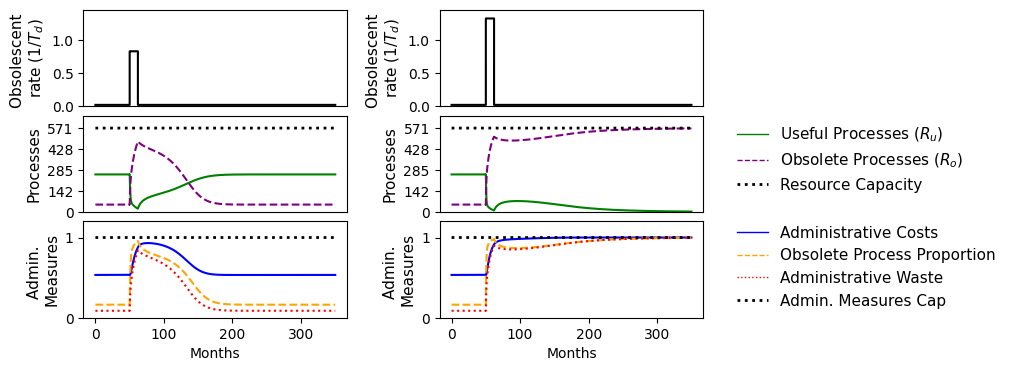

In [40]:
plotShocks(timesteps1, R_us1, R_os1, w_As1, rds1, shock_times1,
           timesteps2, R_us2, R_os2, w_As2, rds2, shock_times2, saveFig = True)

## Comparative Strategies

In [3]:
def make_plot_dic(para1, para2, shock_times, timesteps, R_us, R_os, w_As):
    R_s = np.asarray(R_us)+np.asarray(R_os)
    upper = np.inf if shock_times[1] is None else shock_times[1]
    w_max = np.where((np.asarray(timesteps) >= shock_shock_times[0]) & (np.asarray(timesteps) < upper), para2['w_max'], para1['w_max'])
    prop_R_o = np.asarray(R_os)/np.asarray(R_s)
    prop_w_A = np.asarray(w_As)/w_max
    admin_waste = prop_w_A*prop_R_o
    plot_dic = {"prop_R_o": prop_R_o, "prop_w_A" : prop_w_A, "admin_waste" : admin_waste}
    return plot_dic

def plot_admin_state(ax, timesteps, plot_dic, shock_times):
    ax.plot(timesteps, plot_dic['prop_w_A'], color = 'blue')
    ax.plot(timesteps, plot_dic['prop_R_o'], color = 'orange', linestyle = "--")
    ax.plot(timesteps, plot_dic['admin_waste'], color = 'red', linestyle = ":", linewidth = 2)
    ax.plot(timesteps, np.ones(len(timesteps)), color = 'black', linestyle = ":", linewidth = 2)
    ax.axvline(shock_times[0], color = "black", linestyle = ":", linewidth = 0.75)
    if shock_times[1] is not None:
        ax.axvline(shock_times[1], color = "black", linestyle = ":", linewidth = 0.75)
    ax.set_ylim(0,1.10)

In [4]:
t_span = 100
first_shock_time = 12

init_Rs = (1, 0)
base_para = baseFuncs.paraReset()
base_para['gamma_c'] = 0.9
base_para['dtilde'] = 0.5
base_para['gamma_p'] = 0.5

# Shift
shift_shock_times = [first_shock_time, None]
shift_para = baseFuncs.paraReset()
shift_para['gamma_c'] = 0.7
shift_para['dtilde'] = 0.5
shift_para['gamma_p'] = 0.7

# Shock
shock_shock_times = [first_shock_time, first_shock_time + 12]
shock_para = baseFuncs.paraReset()
shock_para['gamma_c'] = 0.1
shock_para['dtilde'] = 0.5
shock_para['gamma_p'] = 0.9

# The parameters for the process cutting strategy are the same as for the base case (using shift shock times)

# Focus on Production (shock time is same as shift)
prod_para = baseFuncs.paraReset()
prod_para['gamma_c'] = 0.9
prod_para['dtilde'] = 1
prod_para['gamma_p'] = 0.5


# Shift
R_us1, R_os1, w_As1, w_Ds1, Us1, _, timesteps1, rds1 = shockFuncs.simulate_behavioral_shock(base_para, shift_para, t_span, shift_shock_times, 
                                                                                            process_removal_proportion = 0, start_from = init_Rs)

# Shock
R_us2, R_os2, w_As2, w_Ds2, Us2, _, timesteps2, rds2 = shockFuncs.simulate_behavioral_shock(base_para, shock_para, t_span, shock_shock_times, 
                                                                                            process_removal_proportion = 0, start_from = init_Rs)

# Cut
R_us3, R_os3, w_As3, w_Ds3, Us3, _, timesteps3, rds3 = shockFuncs.simulate_behavioral_shock(base_para, base_para, t_span, shift_shock_times, 
                                                                                            process_removal_proportion = 0.5, start_from = init_Rs)

# Produce
R_us4, R_os4, w_As4, w_Ds4, Us4, _, timesteps4, rds4 = shockFuncs.simulate_behavioral_shock(base_para, prod_para, t_span, shift_shock_times, 
                                                                                            process_removal_proportion = 0, start_from = init_Rs)


timesteps = np.asarray(timesteps1)

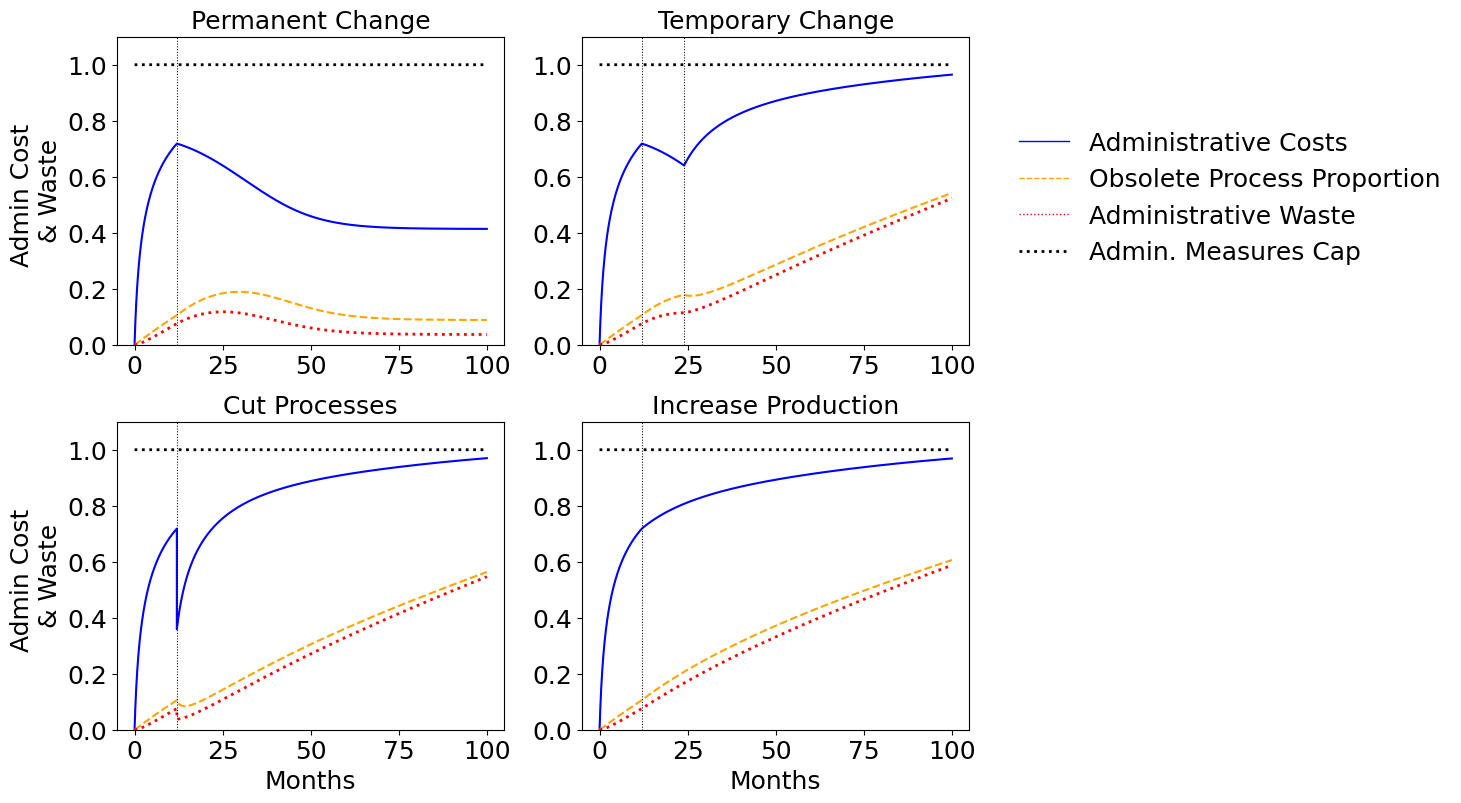

In [8]:
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(2, 2, constrained_layout = False, figsize = (11, 9))
label_fs = 18  # Label font size for y axes
other_fs = 18

# Creating final arrays needed for plot
plot_dic1 = make_plot_dic(base_para, shift_para, shift_shock_times, timesteps1, R_us1, R_os1, w_As1) 
plot_dic2 = make_plot_dic(base_para, shock_para, shock_shock_times, timesteps2, R_us2, R_os2, w_As2) 
plot_dic3 = make_plot_dic(base_para, base_para, shift_shock_times, timesteps3, R_us3, R_os3, w_As3) 
plot_dic4 = make_plot_dic(base_para, prod_para, shift_shock_times, timesteps4, R_us4, R_os4, w_As4) 


# Ploting curves
axs[0,0].set_title("Permanent Change", fontsize = other_fs)
plot_admin_state(axs[0,0], timesteps1, plot_dic1, shift_shock_times)
axs[0,1].set_title("Temporary Change", fontsize = other_fs)
plot_admin_state(axs[0,1], timesteps2, plot_dic2, shock_shock_times)
axs[1,0].set_title("Cut Processes", fontsize = other_fs)
plot_admin_state(axs[1,0], timesteps3, plot_dic3, shift_shock_times)
axs[1,1].set_title("Increase Production", fontsize = other_fs)
plot_admin_state(axs[1,1], timesteps4, plot_dic4, shift_shock_times)

# Axis labels
axs[0,0].set_ylabel('Admin Cost \n& Waste', fontsize = label_fs)
axs[1,0].set_ylabel('Admin Cost \n& Waste', fontsize = label_fs)
axs[1,0].set_xlabel('Months', fontsize = label_fs)
axs[1,1].set_xlabel('Months', fontsize = label_fs)


# Create Legend
drop = 0.2
custom_lines = [Line2D([0], [0], color='blue', lw=1), Line2D([0], [0], color='orange', linestyle = "--", lw=1), 
                    Line2D([0], [0], color='red', linestyle = ":", lw=1),  
                    Line2D([0], [0], color='black', linestyle = ":", lw=2)]
fig.legend(custom_lines, ["Administrative Costs", "Obsolete Process Proportion", "Administrative Waste", "Admin. Measures Cap"], handlelength = 2, 
           bbox_to_anchor=(0.925,1-drop), loc = "upper left", frameon = False, fontsize = other_fs)

plt.subplots_adjust(hspace = 0.25)

plt.show()
#plt.savefig(f"Fig_6_Bloat_Prevention_Strategies.png", dpi = 200, bbox_inches = "tight")